<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 02**
# Basic Neural Network implementation for classification using any Deep Learning framework (Tensorflow/Pytorch)

Date:12\08\2025____________________________________________________________________________________SAP: 500124406

In [ ]:
# Install required libraries (only necessary in Colab)
!pip install torch torchvision --quiet

# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.6 MB/s eta 0:00:00


In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),              # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1]
])

# Load MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 115MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 26.3MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 90.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.72MB/s]


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)     # Hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output layer (10 classes)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/5, Loss: 0.3969
Epoch 2/5, Loss: 0.1875
Epoch 3/5, Loss: 0.1390
Epoch 4/5, Loss: 0.1110
Epoch 5/5, Loss: 0.0963


In [ ]:
# Evaluation
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 96.71%


In [ ]:
# Save model
torch.save(model.state_dict(), "simple_nn.pth")


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score
import numpy as np

# Convert predictions and labels to numpy arrays for scikit-learn metrics
all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_predicted = np.array(all_predicted)
all_labels = np.array(all_labels)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predicted)
f1 = f1_score(all_labels, all_predicted, average='weighted')
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nF1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")

Confusion Matrix:
[[ 965    1    2    0    0    1    4    1    2    4]
 [   0 1123    3    0    0    2    3    0    4    0]
 [   4    1 1002    1    3    0    4    9    8    0]
 [   3    3    8  934    0   26    0   10   20    6]
 [   1    1    6    0  944    1    1    1    1   26]
 [   7    2    0    2    0  857    7    2   12    3]
 [   5    3    2    0    6    3  934    0    5    0]
 [   0    6    9    1    3    0    0  995    1   13]
 [   7    0    4    4    4    2    3    5  942    3]
 [   4    5    1    5    5    3    1    3    7  975]]

F1 Score: 0.9671
Accuracy: 0.9671
Precision: 0.9673


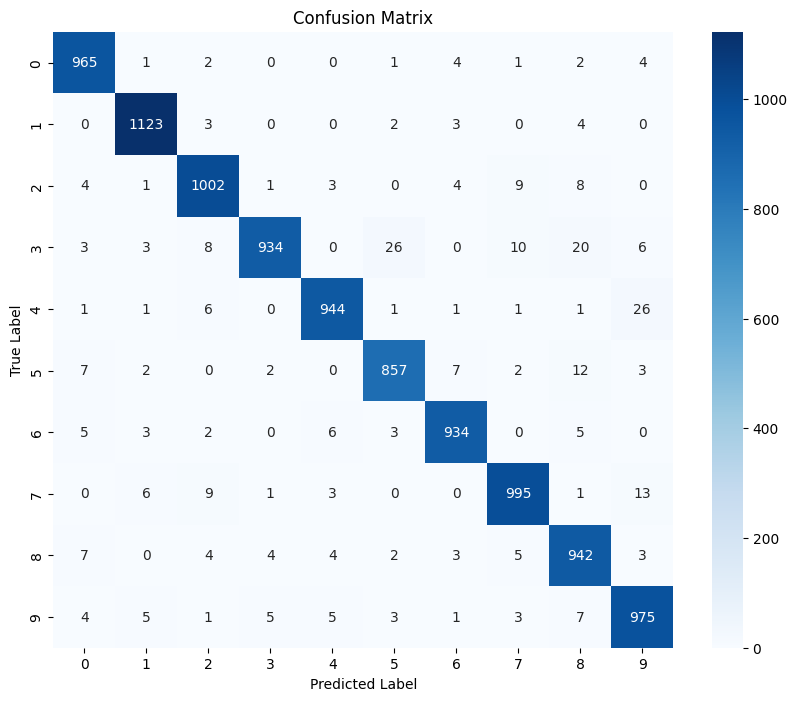

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()